<hr/>

#### Dependencies

Note there are a number of extra libraries that need to be installed in order to undertake machine learning with graphs. Many of the packages seem to be under active development so take care.

1. node2vec
2. karateclub
3. stellargraph
4. GEM

To install node2vec and karateclub, run the following in a jupyter cell:

<code>!pip install node2vec</code>

<code>!pip install karateclub</code>

To install stellagraph, run the following from the command line: 

1. <code>git clone https://github.com/stellargraph/stellargraph.git </code>
2. <code>cd stellargraph</code>
3. <code>run pip install .</code> 

Note that this may create an error as for some reason stellar graph lists python version as <= 3.9 in setup.py. If you are using a later version, update the setup.py and remove this. 

To install gem, run the following from the command line: 

1. <code>git clone https://github.com/palash1992/GEM.git</code>
2. <code>cd to GEM folder</code>
3. <code>run pip install . </code>

<hr/>

In [2]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import pandas as pd
import node2vec as n2v
import karateclub as kc
import random
import stellargraph as sp
from IPython.display import Image
from gem.embedding.gf import GraphFactorization
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Overview 

This series of notebooks on Graph Machine Learning covers the following:

- G0: Libraries and installation, creating and visualisation
- G1: Graph Metrics
- G2: Graph types and available data sets
- G3: Embedding
- G4: Supervised Graph Learning

<hr/>

<b>Aim</b>: Provide some basics around using networkx in Python

<hr/>

<b>Definition</b>: A <b>node</b> is a point in a space where that space has not been defined (i.e is not specified as Euclidian, Hyperbolic, etc)

<b>Definition</b>: An <b>edge</b> is a a line joining in 2 nodes or a node to itself 

<b>Definition</b>: A <b>graph </b> is a any amount of nodes that can have edges joining any node to any other node.

<b>Let</b> G be a graph

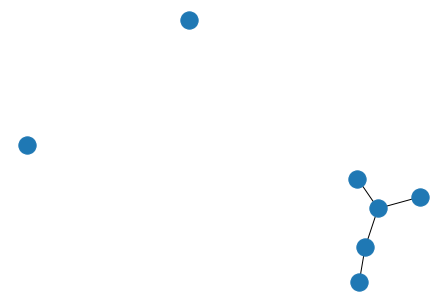

In [3]:
G = nx.Graph()

V = {' Dublin', 'Paris', 'Milan', 'Rome'}
E = [(' Milan','Dublin'), (' Milan','Paris'),
     (' Paris','Dublin'),(' Milan','Rome')]
# add to graph
G.add_nodes_from(V)
G.add_edges_from(E)
nx.draw(G)

<b>Observe</b>: For convenience, nodes and edges are often given labels. 

In [76]:
#order of graph is # vertices or nodes
len(G.nodes)
G.number_of_nodes()

7

In [77]:
# Size is number of edges
G.number_of_edges()

4

In [78]:
# number of edges/links adjacent to it
G.degree()

DegreeView({'Milan': 0, 'Rome': 1, ' Dublin': 0, 'Paris': 1, ' Milan': 3, 'Dublin': 2, ' Paris': 1})

In [79]:
G = nx.Graph() 
V = {'Dublin', 'Paris', 'Milan', 'Rome'} 
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

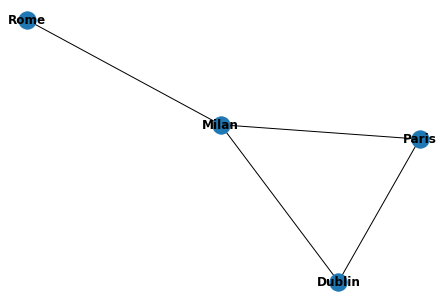

In [80]:
nx.draw(G, with_labels = True, font_weight = 'bold')

In [81]:
# Paris / dublin vertices have degree 2, Milan degree 3, Rome degree 1

In [82]:
print(G.number_of_nodes())
print(G.number_of_edges())
print(G.degree())
print(nx.ego_graph(G, "Dublin").nodes)
print(nx.ego_graph(G, "Dublin").edges)


4
4
[('Dublin', 2), ('Milan', 3), ('Rome', 1), ('Paris', 2)]
['Dublin', 'Milan', 'Paris']
[('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris')]


In [83]:
newNodes = {"London", "Madrid"}
newEdges = [("London", "Rome"), ("Madrid", "Paris")]

In [84]:
G.add_nodes_from(newNodes)
G.add_edges_from(newEdges)

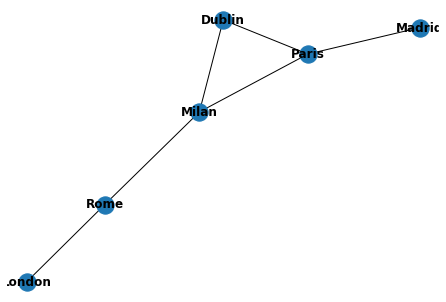

In [85]:
nx.draw(G, with_labels = True, font_weight = 'bold')

<hr/>
<b>Aim</b> Examine directed Graphs
<hr/>

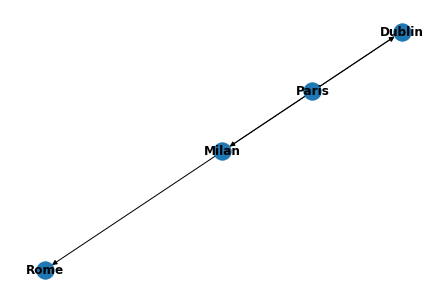

In [86]:
# here node degree is Indegree and Outdegree

G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', "Rome"}
E = [("Milan", "Dublin"),("Paris", "Milan"),("Paris", "Dublin"),("Milan", "Rome")]
G.add_nodes_from(V)
G.add_edges_from(E)

nx.draw(G, with_labels = True, font_weight = 'bold')

In [92]:
dmg = nx.MultiDiGraph()
umg = nx.MultiGraph()

V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin', 19), ('Milan','Dublin', 8), ('Paris','Milan', 5), ('Paris','Dublin', 7), ('Milan','Rome', 55), ('Milan','Rome', 66)]

dmg.add_nodes_from(V)
dmg.add_edges_from(E)

[19, 8, 5, 7, 55, 66]

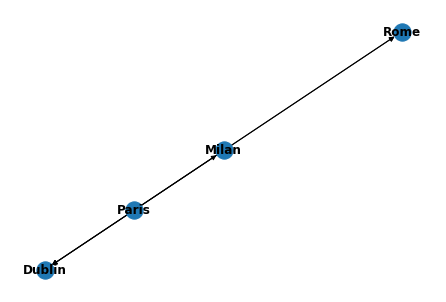

In [93]:
nx.draw(dmg, with_labels = True, font_weight = 'bold')

In [96]:
# Adjacency matrix
nx.to_pandas_adjacency(G)

,Dublin,Milan,Rome,Paris
Dublin,0.0,0.0,0.0,0.0
Milan,1.0,0.0,1.0,0.0
Rome,0.0,0.0,0.0,0.0
Paris,1.0,1.0,0.0,0.0


In [95]:
nx.to_numpy_matrix(G)

matrix([[0., 0., 0., 0.],
        [1., 0., 1., 0.],
        [0., 0., 0., 0.],
        [1., 1., 0., 0.]])

In [97]:
# Edge list 
nx.to_pandas_edgelist(dmg)

,source,target
0,Milan,Dublin
1,Milan,Dublin
2,Milan,Rome
3,Milan,Rome
4,Paris,Milan
5,Paris,Dublin


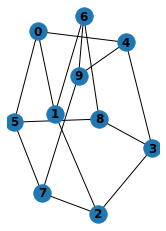

In [99]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')